In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
housing = pd.read_csv(r'E:\Machine Learning_MLZoomCamp\Week 2\housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
housing = housing.drop(['ocean_proximity'], axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


#### Goal: The goal of this homework is to create a regression model for predicting housing prices

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

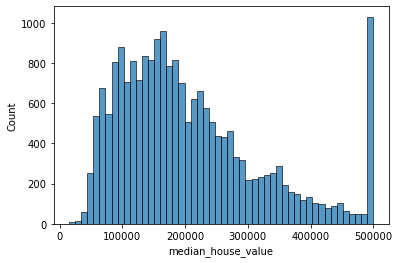

In [5]:
sns.histplot(housing.median_house_value, bins = 50)

In [6]:
house_value_logs = np.log1p(housing.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

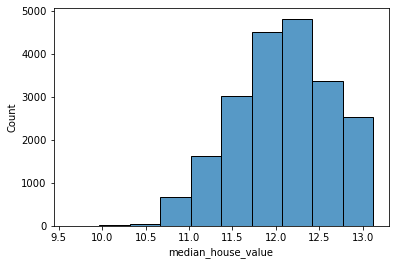

In [7]:
sns.histplot(house_value_logs, bins = 10)

# Question 1: Number of missing values

In [8]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

#### Solution 1: `207`

##### Setting up validation framework

In [9]:
n= len(housing)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test
print(n)

20640


In [10]:
n, n_val+n_test+n_train

(20640, 20640)

In [11]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [12]:
housing.iloc[20631:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0


In [13]:
housing_train = housing.iloc[:n_train]
housing_val = housing.iloc[n_train:n_train+n_val]
housing_test = housing.iloc[n_train+n_val:]

In [14]:
idx = np.arange(n)

In [15]:
np.random.seed(2)
np.random.shuffle(idx)
idx

array([10385,  1943,  7490, ..., 11798,  6637,  2575])

In [16]:
housing_train = housing.iloc[idx[:n_train]]
housing_val = housing.iloc[idx[n_train:n_train+n_val]]
housing_test = housing.iloc[idx[n_train+n_val:]]

In [17]:
len(housing_train), len(housing_val), len(housing_test)

(12384, 4128, 4128)

In [18]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10385,-117.65,33.60,15.0,5736.0,NaN,2529.0,762.0,6.4114,278700.0
1943,-120.91,38.62,12.0,4545.0,748.0,2033.0,718.0,4.1843,207600.0
7490,-118.23,33.93,35.0,1149.0,277.0,909.0,214.0,1.7411,96700.0
16889,-122.37,37.59,39.0,4645.0,1196.0,2156.0,1113.0,3.4412,353800.0
11416,-117.98,33.70,16.0,5127.0,631.0,2142.0,596.0,7.8195,390500.0


In [19]:
housing_train = housing_train.reset_index(drop =True)
housing_val = housing_val.reset_index(drop =True)
housing_test = housing_test.reset_index(drop =True)

In [20]:
y_train = np.log1p(housing_train.median_house_value.values)
y_val = np.log1p(housing_val.median_house_value.values)
y_test = np.log1p(housing_test.median_house_value.values)

In [21]:
del housing_train['median_house_value']
del housing_val['median_house_value']
del housing_test['median_house_value']

# Question 2: Median for population

In [23]:
housing.population.median()

1166.0

### Question 3: Best way to fill NAs

### Question 4: Best regularization parameter r

### Question 5: STD of RMSE scores for different seeds

### Question 6: RMSE on test